In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [3]:

import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("Customer behaviour Tourism.csv")

In [8]:
df.shape


(11760, 17)

In [10]:
df.head(45)


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
5,1000006,No,240.0,iOS,35175.0,1,2,Financial,79.0,3068,0,No,13,No,3,0.0,8.0
6,1000007,No,NaN,iOS and Android,46340.0,1,Three,Medical,81.0,2670,4,Yes,20,Yes,1,3.0,12.0
7,1000008,No,225.0,iOS and Android,NaN,24,1,Financial,67.0,2693,1,No,22,Yes,2,1.0,1.0
8,1000009,No,285.0,iOS,7560.0,23,3,Financial,44.0,9526,0,No,21,Yes,2,0.0,10.0
9,1000010,No,270.0,iOS and Android,45465.0,27,3,NaN,94.0,5237,6,No,13,No,2,2.0,17.0


In [12]:
df.tail(45)


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
11715,1011716,No,259.0,Tab,17584.0,15,2,Historical site,111.0,4939,0,Yes,27,No,1,1.0,13.0
11716,1011717,No,254.0,Tab,9400.0,29,4,Beach,60.0,2901,3,No,22,No,3,0.0,9.0
11717,1011718,No,309.0,Tab,19057.0,1,4,Beach,100.0,2463,10,No,27,No,3,2.0,11.0
11718,1011719,No,252.0,Tab,8226.0,1,4,Historical site,84.0,2324,2,No,26,No,2,1.0,4.0
11719,1011720,No,300.0,Tab,4117.0,24,1,Beach,67.0,4160,9,No,27,No,1,0.0,23.0
11720,1011721,No,297.0,Tab,7093.0,10,3,Historical site,123.0,13264,5,No,33,No,1,1.0,24.0
11721,1011722,No,254.0,Tab,28089.0,1,4,Big Cities,57.0,10478,3,No,32,No,3,2.0,19.0
11722,1011723,No,282.0,Tab,5692.0,10,3,Beach,52.0,13808,2,Yes,43,Yes,1,1.0,20.0
11723,1011724,No,199.0,Tab,48415.0,8,2,Other,100.0,4965,0,Yes,39,Yes,2,1.0,10.0
11724,1011725,No,398.0,Mobile,20521.0,29,4,Beach,65.0,3545,4,No,38,No,2,2.0,25.0


In [14]:
df.columns

Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')

In [16]:
funnel_data = df[['UserID', 'Yearly_avg_view_on_travel_page', 'Yearly_avg_comment_on_travel_page', 'Taken_product']].copy()

funnel_stages = ['View Travel Page', 'Comment on Travel Page', 'Buy Product']

# Convert 'Taken_product' to binary (1 for 'Yes', 0 for 'No')
funnel_data['Buy Product'] = (funnel_data['Taken_product'] == 'Yes').astype(int)

In [18]:
# Calculate the percentage of users at each stage
funnel_data['View Travel Page'] = funnel_data['Yearly_avg_view_on_travel_page'].apply(lambda x: 1 if x > 0 else 0)
funnel_data['Comment on Travel Page'] = funnel_data['Yearly_avg_comment_on_travel_page'].apply(lambda x: 1 if x > 0 else 0)

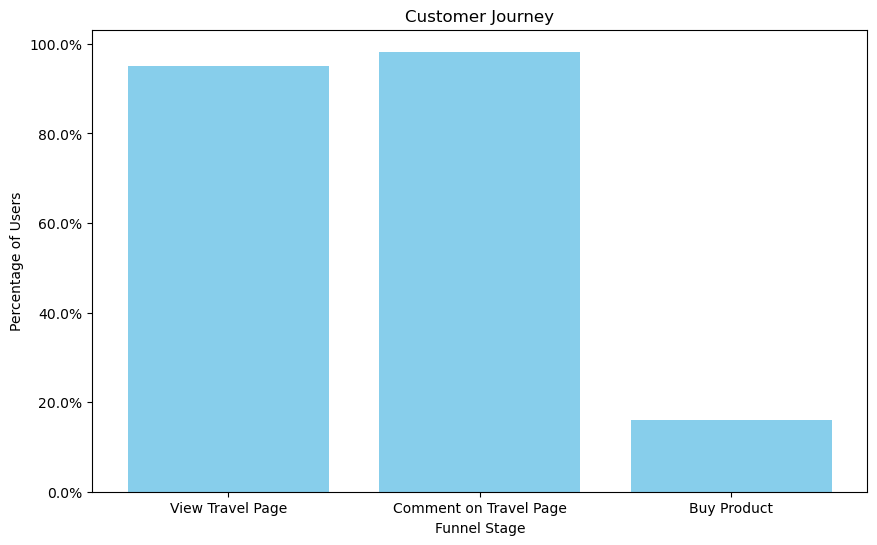

In [20]:
funnel_percentages = []
for stage in funnel_stages:
    percentage = funnel_data[stage].mean() * 100
    funnel_percentages.append(percentage)

# Funnel Visualization
plt.figure(figsize=(10, 6))
plt.bar(funnel_stages, funnel_percentages, color='skyblue')
plt.title('Customer Journey')
plt.xlabel('Funnel Stage')
plt.ylabel('Percentage of Users')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=1))
plt.show()

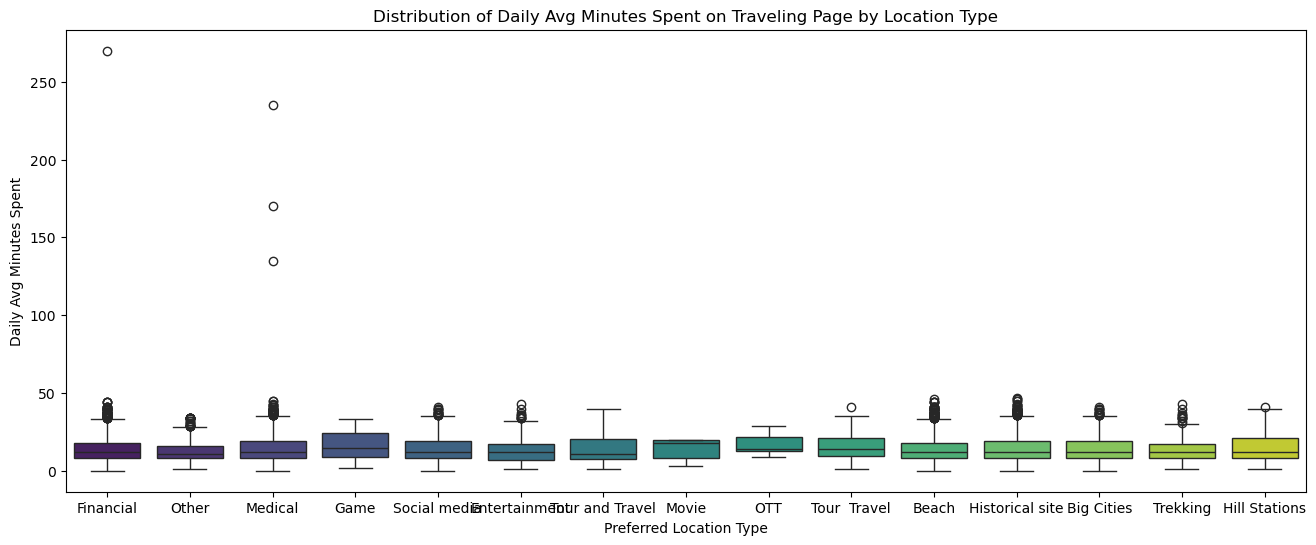

In [22]:
# Box plot to visualize the distribution of daily average minutes spent for different location types
plt.figure(figsize=(16, 6))
sns.boxplot(x='preferred_location_type', y='Daily_Avg_mins_spend_on_traveling_page', data=df, palette='viridis')
plt.title('Distribution of Daily Avg Minutes Spent on Traveling Page by Location Type')
plt.xlabel('Preferred Location Type')
plt.ylabel('Daily Avg Minutes Spent')
plt.show()

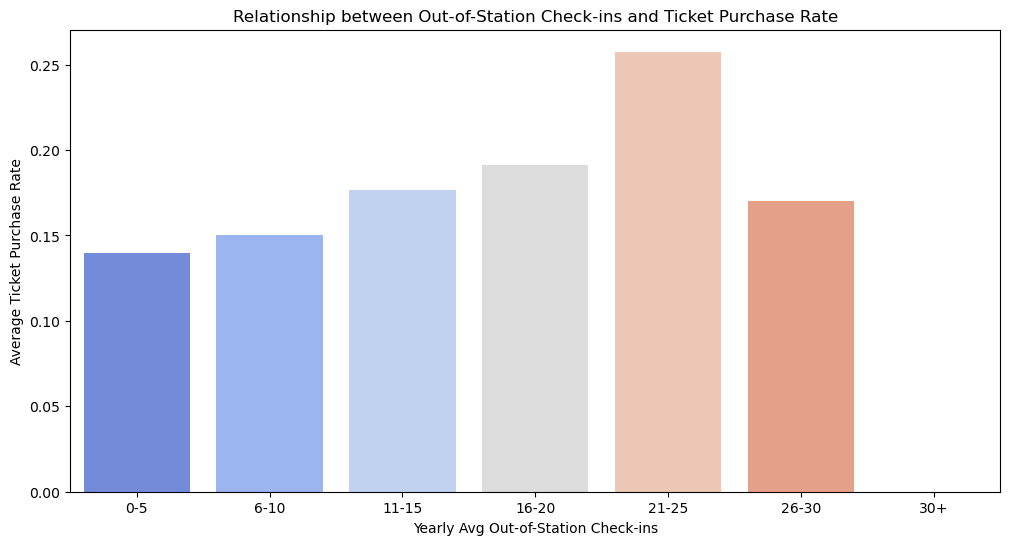

In [24]:
# Convert 'yearly_avg_Outstation_checkins' to numeric (in case it's not)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce')

# Create bins for yearly average out-of-station check-ins
bins = [0, 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']

df['Outstation_checkin_bins'] = pd.cut(df['yearly_avg_Outstation_checkins'], bins=bins, labels=labels, right=False)

# Convert 'Taken_product' to binary (1 for 'Yes', 0 for 'No')
df['Taken_product'] = (df['Taken_product'] == 'Yes').astype(int)

# Calculate the average ticket purchase rate for each bin
purchase_rate_by_bin = df.groupby('Outstation_checkin_bins')['Taken_product'].mean()

# Bar plot to visualize the relationship between out-of-station check-ins and ticket purchase rate
plt.figure(figsize=(12, 6))
sns.barplot(x=purchase_rate_by_bin.index, y=purchase_rate_by_bin.values, palette='coolwarm')
plt.title('Relationship between Out-of-Station Check-ins and Ticket Purchase Rate')
plt.xlabel('Yearly Avg Out-of-Station Check-ins')
plt.ylabel('Average Ticket Purchase Rate')
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [28]:
# Drop rows with missing values in the selected features
features_for_clustering = ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page']
df_clustering = df[features_for_clustering].dropna()

# Extract the selected features
X = df_clustering

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

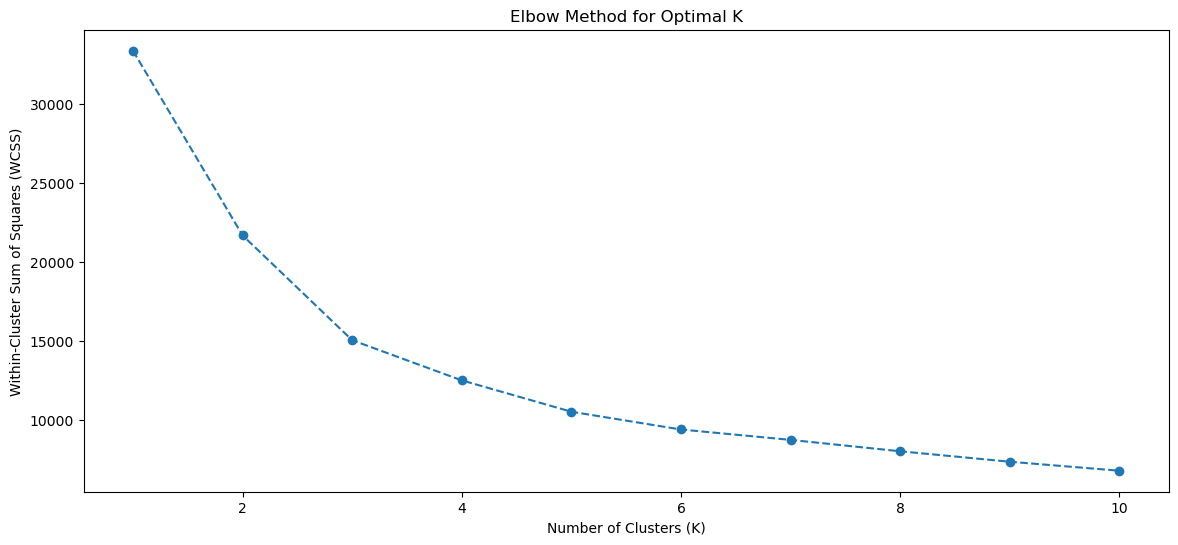

In [30]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(14, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


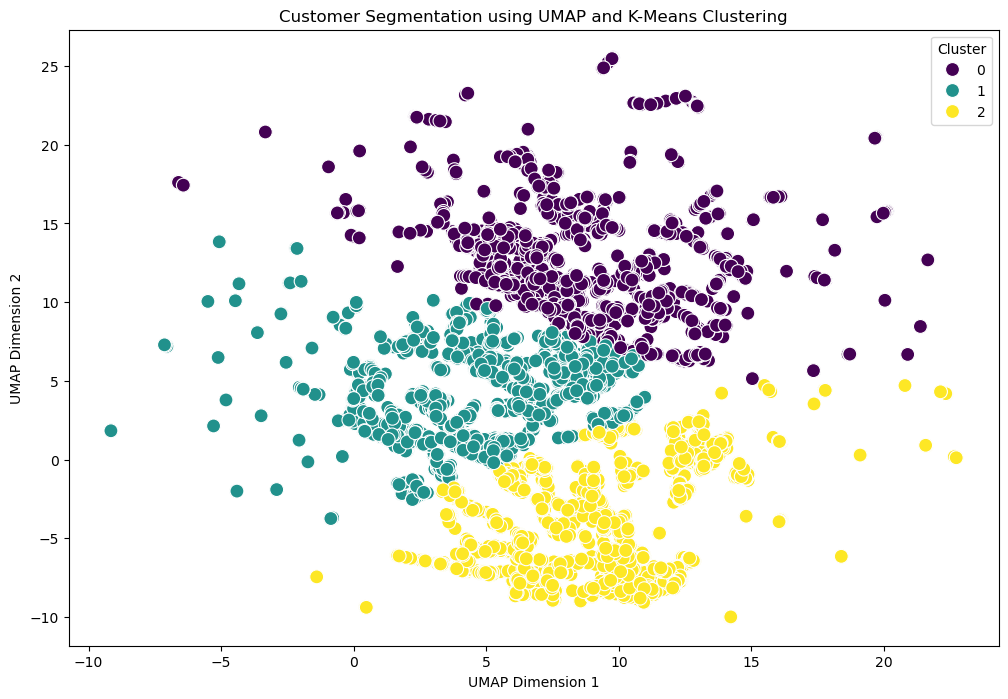

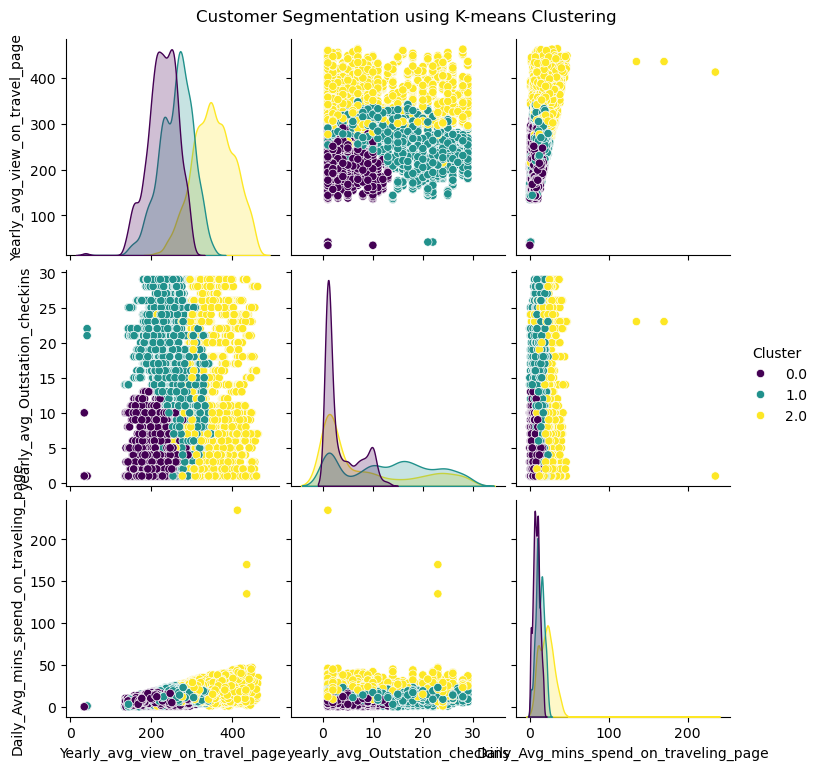

In [35]:
# Based on the Elbow Method, optimal K is 3
optimal_k = 3

# Apply K-means clustering with the optimal K
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values in the selected features
features_for_clustering = ['Yearly_avg_view_on_travel_page', 'yearly_avg_Outstation_checkins', 'Daily_Avg_mins_spend_on_traveling_page']
df_clustering = df[features_for_clustering].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

# Apply UMAP for dimensionality reduction (reduce to 2D for visualization)
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)

# Apply K-Means clustering on the reduced data
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_umap)

# Add UMAP and cluster results to the DataFrame
df_clustering['UMAP_1'] = X_umap[:, 0]
df_clustering['UMAP_2'] = X_umap[:, 1]

df_clustering['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='Cluster', palette='viridis', data=df_clustering, s=100)
plt.title('Customer Segmentation using UMAP and K-Means Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster')
plt.show()

# Merge the clustering results back to the original dataframe
df = pd.merge(df, df_clustering[['Cluster']], left_index=True, right_index=True, how='left')

# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='viridis', diag_kind='kde', vars=features_for_clustering)
plt.suptitle('Customer Segmentation using K-means Clustering', y=1.02)
plt.show()
